<a href="https://colab.research.google.com/github/AIvantsiv070593/Colab/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install optuna

In [48]:
import csv
import pandas as pd
import seaborn as sns
import optuna

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt

import xgboost as xgb

sns.set()

In [58]:
#Подготовим данные
data_file = 'parkinsons.data.csv'

df_data = pd.read_csv(data_file, sep=',')
y_output = df_data['status']
x_input = df_data.drop(['name','status'], axis=1)

In [ ]:
# Нормализуем данные
d = normalize(x_input, axis=0)
x_input = pd.DataFrame(d, columns=x_input.columns)
print(x_input.head())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_input, y_output, test_size=0.2, random_state=0)
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Точность модели: 94.87179487179486%


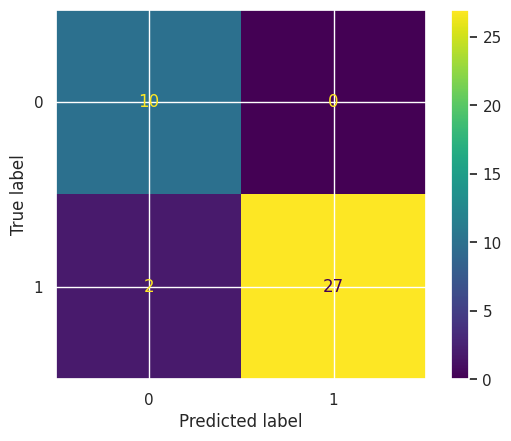

In [61]:
# Предсказание категорий для тестовых данных
y_pred = xgb_model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100}%")


cm =confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [62]:
# Функиця для определения точности модели с задаными параметрами
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)
    y_pred = optuna_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Найдем лучшую комбинацию параметров для модели
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# print('Number of finished trials: {}'.format(len(study.trials)))
# print('Best trial:')
trial = study.best_trial

# print('  Value: {}'.format(trial.value))
# print('  Params: ')

# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))

Точность модели: 97.43589743589743%


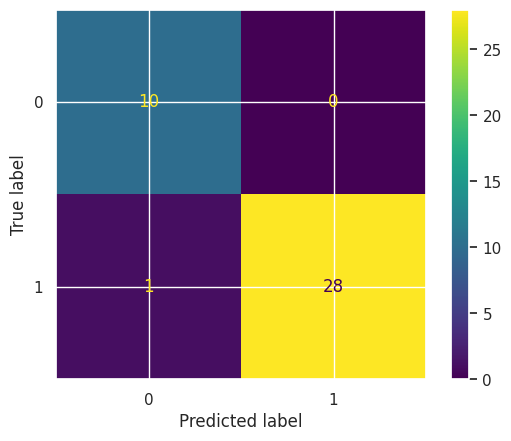

In [65]:
params = trial.params

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

# Предсказание категорий для тестовых данных
y_pred = xgb_model.predict(X_test)
# print(y_pred)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100}%")


cm =confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()